In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [4]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression() ## Select only the 'Level' column (index 1), The problem is the first column contains string values ('Position'), We need to select only the 'Level' column as the feature
regressor.fit(x, y)

LinearRegression()

In [5]:
# Training the polynomial regression model on the whole dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
x_poly = poly_reg.fit_transform(x)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(x_poly, y)

LinearRegression()

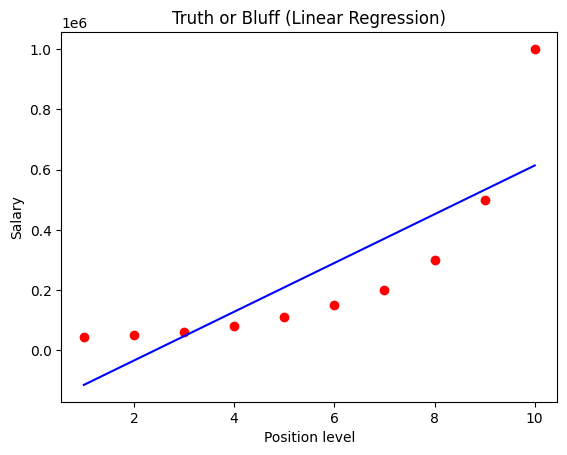

In [6]:
# Visualizing Linear Regression results
plt.scatter(x, y, color='red')
plt.plot(x, regressor.predict(x), color='blue')  # Fixed here
plt.title('Truth or Bluff (Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


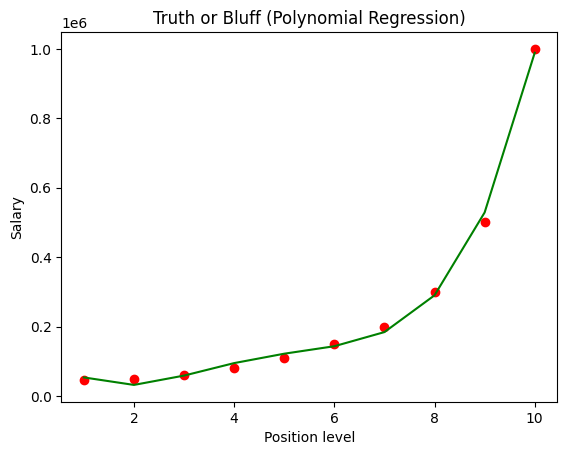

In [7]:
# Visualizing Polynomial Regression results
plt.scatter(x, y, color='red')
plt.plot(x, lin_reg_2.predict(poly_reg.fit_transform(x)), color='green')  # Polynomial model
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

<ipython-input-8-c54a0161f409>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_grid = np.arange(min(x), max(x), 0.1)


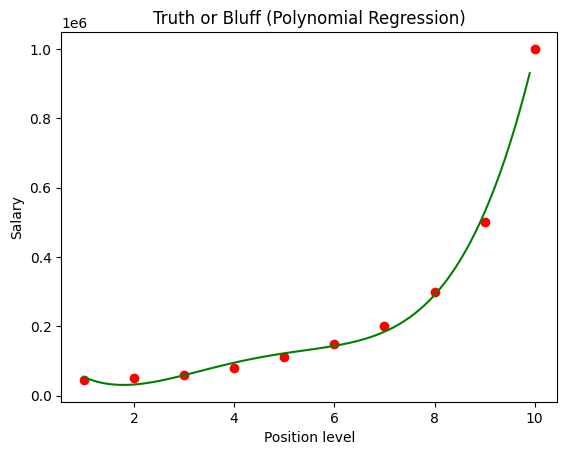

In [8]:
# Creating a grid of values for smoother curve
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape((len(x_grid), 1))

# Plotting the results
plt.scatter(x, y, color='red')
plt.plot(x_grid, lin_reg_2.predict(poly_reg.fit_transform(x_grid)), color='green')  # Polynomial model
plt.title('Truth or Bluff (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [ ]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]])) # predicting new salaris with polynomial linear regression

array([158862.45265155])

In [10]:
regressor.predict([[6.5]])  # Predicting salary using Linear Regression, 2D arry for continuing the value 6.5 to sell 6.5

array([330378.78787879])

In [13]:
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0) # Changed 'X' to 'x'

In [14]:
#Training the Polynomial Regression model on the Training set
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

In [15]:
#Predicting the Test set results
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[ 62618.49  60000.  ]
 [554488.62 500000.  ]]


In [16]:
#Evaluating the Model Performance
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.9692575841570868